In [1]:
import numpy as np 
import pandas as pd 
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("pradataset.csv")

In [3]:
df

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [4]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


<Axes: xlabel='sex', ylabel='Count'>

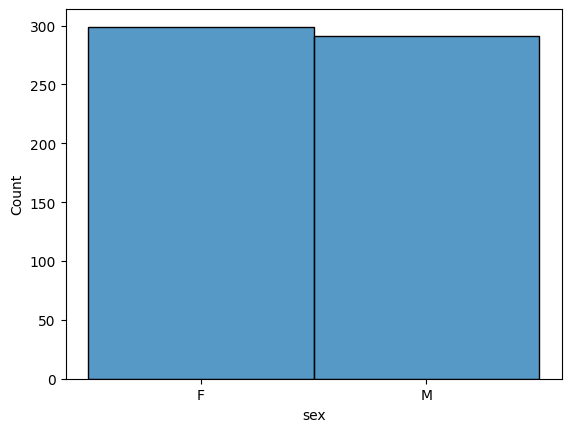

In [5]:
sns.histplot(data=df,x='sex')

<Axes: xlabel='diagnosis', ylabel='Count'>

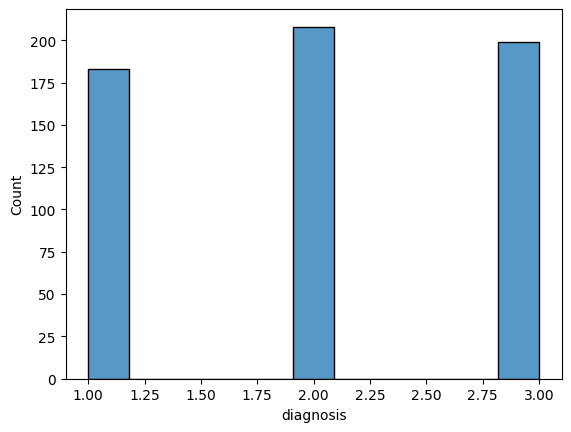

In [6]:
sns.histplot(data=df,x='diagnosis')

<Axes: xlabel='patient_cohort', ylabel='Count'>

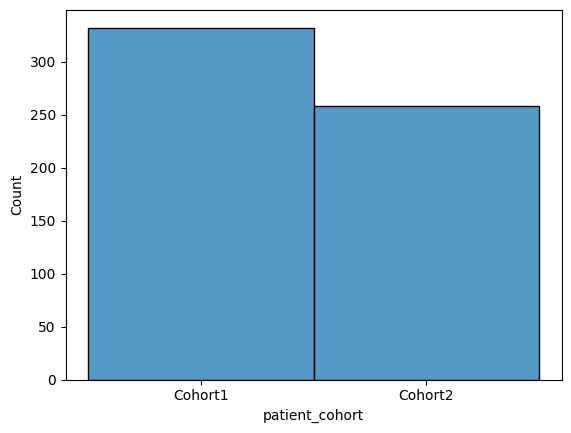

In [7]:
sns.histplot(data=df,x='patient_cohort')

In [8]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

<Axes: xlabel='diagnosis'>

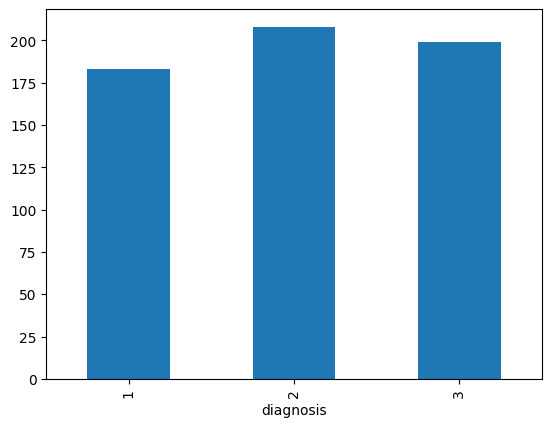

In [9]:
(df.groupby('diagnosis')
   ['sample_id'].nunique()
   .plot.bar()
)

In [10]:
df['diagnosis'].replace([1,2,3], [0,1,2], inplace=True)

In [11]:
df=df.drop("sample_id",axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_cohort           590 non-null    object 
 1   sample_origin            590 non-null    object 
 2   age                      590 non-null    int64  
 3   sex                      590 non-null    object 
 4   diagnosis                590 non-null    int64  
 5   stage                    199 non-null    object 
 6   benign_sample_diagnosis  208 non-null    object 
 7   plasma_CA19_9            350 non-null    float64
 8   creatinine               590 non-null    float64
 9   LYVE1                    590 non-null    float64
 10  REG1B                    590 non-null    float64
 11  TFF1                     590 non-null    float64
 12  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 60.1+ KB


In [13]:
df["patient_cohort"].unique()

array(['Cohort1', 'Cohort2'], dtype=object)

In [14]:
df["diagnosis"].unique()

array([0, 1, 2], dtype=int64)

In [15]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()

df['patient_cohort']= label_encoder.fit_transform(df['patient_cohort'])

In [16]:
df['patient_cohort']=df['patient_cohort'].astype(int)

In [17]:
df['sample_origin'].unique()

array(['BPTB', 'LIV', 'ESP', 'UCL'], dtype=object)

In [18]:
df['sample_origin']= label_encoder.fit_transform(df['sample_origin'])
df['sample_origin']=df['sample_origin'].astype(int)

In [19]:
df['sex']= label_encoder.fit_transform(df['sex'])
df['sex']=df['sex'].astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_cohort           590 non-null    int32  
 1   sample_origin            590 non-null    int32  
 2   age                      590 non-null    int64  
 3   sex                      590 non-null    int32  
 4   diagnosis                590 non-null    int64  
 5   stage                    199 non-null    object 
 6   benign_sample_diagnosis  208 non-null    object 
 7   plasma_CA19_9            350 non-null    float64
 8   creatinine               590 non-null    float64
 9   LYVE1                    590 non-null    float64
 10  REG1B                    590 non-null    float64
 11  TFF1                     590 non-null    float64
 12  REG1A                    306 non-null    float64
dtypes: float64(6), int32(3), int64(2), object(2)
memory usage: 53.1+ KB


In [21]:
df['diagnosis'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
df['stage']=df['stage'].fillna('0')

In [23]:
df['stage'].unique()

array(['0', 'I', 'IA', 'IB', 'II', 'IIA', 'IIB', 'III', 'IV'],
      dtype=object)

In [24]:
df['stage']= label_encoder.fit_transform(df['stage'])
df['stage']=df['stage'].astype(int)

In [25]:
df['benign_sample_diagnosis'].unique()

array([nan, 'Abdominal Pain ', 'Biliary Stricture (Secondary to Stent) ',
       'Cholecystitis', 'Cholecystitis ', 'Cholecystitis (Chronic) ',
       'Cholecystitis (Chronic) Cholelithiasis',
       'Cholecystitis (Chronic) Cholesterolsis', 'Choledochal Cyst ',
       'Choledocholiathiasis', 'Choledocholiathiasis ',
       'Cholelithiasis with adenomyomatous hyperplasia ',
       'Duodenal Stricture', 'Duodenitis', 'Gallbladder polyps ',
       'Gallbladder Porcelain', 'Gallstones', 'Gallstones ',
       'Gallstones - Incidental ', 'Gastritis ', 'Gastritis and Reflux ',
       'Ill defined lesion in uncinate process',
       'Ischaemic Common Bile Duct Stricture',
       'Pancreatitis (Pseudocyst)', 'Pancreatitis', 'Pancreatitis ',
       'Pancreatitis (Abscess)', 'Pancreatitis (Acute)',
       'Pancreatitis (Alcohol-Chronic-Pseuodcyst)',
       'Pancreatitis (Alcohol-Chronic)', 'Pancreatitis (Alcohol)',
       'Pancreatitis (Autoimmune) ', 'Pancreatitis (Chronic-Pseudocyst) ',
      

In [26]:
df['benign_sample_diagnosis']=df['benign_sample_diagnosis'].fillna("null")

In [27]:
df.isnull().sum()

patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis      0
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [28]:
df['plasma_CA19_9']=df['plasma_CA19_9'].fillna(df['plasma_CA19_9'].mean())

In [29]:
df['REG1A']=df['REG1A'].fillna(df['REG1A'].mean())

In [30]:
df=df.drop("benign_sample_diagnosis",axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_cohort  590 non-null    int32  
 1   sample_origin   590 non-null    int32  
 2   age             590 non-null    int64  
 3   sex             590 non-null    int32  
 4   diagnosis       590 non-null    int64  
 5   stage           590 non-null    int32  
 6   plasma_CA19_9   590 non-null    float64
 7   creatinine      590 non-null    float64
 8   LYVE1           590 non-null    float64
 9   REG1B           590 non-null    float64
 10  TFF1            590 non-null    float64
 11  REG1A           590 non-null    float64
dtypes: float64(6), int32(4), int64(2)
memory usage: 46.2 KB


In [32]:
X=df.drop("diagnosis",axis=1)
y=df['diagnosis']

In [33]:
# Build a Dataframe with Correlation between Features
corr_matrix = X.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
# Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.8]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix.head()

,feature1,feature2,Correlation


In [34]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

y= label_encoder.fit_transform(y)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=60)

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100,max_depth=6,min_samples_split=2,min_weight_fraction_leaf =0.0,n_jobs=-1)
etc.fit(X_train, y_train)
print(etc.score(X_test, y_test)*100)
y_pred9 = etc.predict(X_test)

84.61538461538461


In [37]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred9, average='macro')

(0.8551587301587302, 0.8566666666666666, 0.8517786561264823, None)

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
clf.fit(X_train, y_train)
 

y_pred8 = clf.predict(X_test)

In [39]:
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print( metrics.accuracy_score(y_test, y_pred8)*100)


84.61538461538461


In [40]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred8, average='macro')

(0.8513661202185793, 0.8500000000000001, 0.8506424057226196, None)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_test_predict2=dtc.predict(X_test)
test_accuracy=(metrics.accuracy_score(y_test,y_test_predict2)*100)
test_accuracy

81.53846153846153

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(X_train,y_train)
y_test_predict4=svc.predict(X_test)
test_accuracy=(accuracy_score(y_test,y_test_predict4)*100)
test_accuracy

50.256410256410255

In [43]:
df.head()

,patient_cohort,sample_origin,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,33,0,0,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,0,0,81,0,0,0,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,1,0,51,1,0,0,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,1,0,61,1,0,0,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,1,0,62,1,0,0,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222


In [44]:
features = np.array([[0,0,33,0,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000]])
print(clf.predict(features))

[1]


C:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_cohort  590 non-null    int32  
 1   sample_origin   590 non-null    int32  
 2   age             590 non-null    int64  
 3   sex             590 non-null    int32  
 4   diagnosis       590 non-null    int64  
 5   stage           590 non-null    int32  
 6   plasma_CA19_9   590 non-null    float64
 7   creatinine      590 non-null    float64
 8   LYVE1           590 non-null    float64
 9   REG1B           590 non-null    float64
 10  TFF1            590 non-null    float64
 11  REG1A           590 non-null    float64
dtypes: float64(6), int32(4), int64(2)
memory usage: 46.2 KB


In [46]:
df.tail(10)

,patient_cohort,sample_origin,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
580,0,0,46,1,2,8,654.002944,0.75777,10.578610,206.526460,3203.940000,7879.000000
581,0,0,61,0,2,8,13740.000000,0.32799,5.232527,123.104730,755.820867,2331.500000
582,1,0,58,0,2,8,654.002944,2.39772,0.289500,6.824000,799.256000,735.281222
583,1,0,84,1,2,8,654.002944,0.66729,5.764349,950.080000,1945.172000,735.281222
584,1,0,66,1,2,8,654.002944,0.93873,7.085637,815.136000,2367.590000,735.281222
585,1,0,68,1,2,8,654.002944,0.52026,7.058209,156.241000,525.178000,735.281222
586,1,0,71,0,2,8,654.002944,0.85956,8.341207,16.915000,245.947000,735.281222
587,1,0,63,1,2,8,654.002944,1.36851,7.674707,289.701000,537.286000,735.281222
588,1,0,75,0,2,8,654.002944,1.33458,8.206777,205.930000,722.523000,735.281222
589,0,0,74,1,2,8,1488.000000,1.50423,8.200958,411.938275,2021.321078,13200.000000


In [47]:
features = np.array([[0,0,46,1,8,654.002944,0.75777,10.578610,206.526460,3203.940000,7879.000000]])
print(clf.predict(features))

[2]


C:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
df.head(20)

,patient_cohort,sample_origin,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,33,0,0,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,0,0,81,0,0,0,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,1,0,51,1,0,0,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,1,0,61,1,0,0,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,1,0,62,1,0,0,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222
5,1,0,53,1,0,0,654.002944,0.84825,0.003393,62.12600,59.793000,735.281222
6,1,0,70,1,0,0,654.002944,0.62205,0.174381,152.27700,117.516000,735.281222
7,1,0,58,0,0,0,11.000000,0.89349,0.003574,3.73000,40.294000,735.281222
8,1,0,59,0,0,0,654.002944,0.48633,0.001945,7.02100,26.782000,735.281222
9,1,0,56,0,0,0,24.000000,0.61074,0.278778,83.92800,19.185000,735.281222


In [49]:
features = np.array([[0,0,28,0,0,8.700000,0.50895,0.583010,13.61906,267.193539,381.000000	]])
print(clf.predict(features))

[1]


C:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
df['diagnosis'].unique()

array([0, 1, 2], dtype=int64)

In [51]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                importance
stage             0.341073
TFF1              0.117246
LYVE1             0.111126
plasma_CA19_9     0.080800
REG1B             0.079331
age               0.068155
sample_origin     0.063227
creatinine        0.058653
REG1A             0.043725
patient_cohort    0.025819
sex               0.010844


In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    # Add other parameters to tune
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'max_depth': 10, 'n_estimators': 100}


In [53]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred8))
print("\nClassification Report:\n", classification_report(y_test, y_pred8))


Confusion Matrix:
 [[46 14  0]
 [15 60  0]
 [ 0  1 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76        60
           1       0.80      0.80      0.80        75
           2       1.00      0.98      0.99        60

    accuracy                           0.85       195
   macro avg       0.85      0.85      0.85       195
weighted avg       0.85      0.85      0.85       195



In [54]:
features = np.array([[0,0,81,0,0,654.002944,0.97266,2.037585,94.467030,209.488250,228.407000]])
print(clf.predict(features))

[0]


C:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
X

,patient_cohort,sample_origin,age,sex,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,33,0,0,11.700000,1.83222,0.893219,52.948840,654.282174,1262.000000
1,0,0,81,0,0,654.002944,0.97266,2.037585,94.467030,209.488250,228.407000
2,1,0,51,1,0,7.000000,0.78039,0.145589,102.366000,461.141000,735.281222
3,1,0,61,1,0,8.000000,0.70122,0.002805,60.579000,142.950000,735.281222
4,1,0,62,1,0,9.000000,0.21489,0.000860,65.540000,41.088000,735.281222
...,...,...,...,...,...,...,...,...,...,...,...
585,1,0,68,1,8,654.002944,0.52026,7.058209,156.241000,525.178000,735.281222
586,1,0,71,0,8,654.002944,0.85956,8.341207,16.915000,245.947000,735.281222
587,1,0,63,1,8,654.002944,1.36851,7.674707,289.701000,537.286000,735.281222
588,1,0,75,0,8,654.002944,1.33458,8.206777,205.930000,722.523000,735.281222


In [56]:
features = np.array([[0,0,74,1,8,1488.000000,1.50423,8.200958,411.938275,2021.321078,13200.000000]])
print(clf.predict(features))

[2]


C:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [57]:
X

,patient_cohort,sample_origin,age,sex,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,33,0,0,11.700000,1.83222,0.893219,52.948840,654.282174,1262.000000
1,0,0,81,0,0,654.002944,0.97266,2.037585,94.467030,209.488250,228.407000
2,1,0,51,1,0,7.000000,0.78039,0.145589,102.366000,461.141000,735.281222
3,1,0,61,1,0,8.000000,0.70122,0.002805,60.579000,142.950000,735.281222
4,1,0,62,1,0,9.000000,0.21489,0.000860,65.540000,41.088000,735.281222
...,...,...,...,...,...,...,...,...,...,...,...
585,1,0,68,1,8,654.002944,0.52026,7.058209,156.241000,525.178000,735.281222
586,1,0,71,0,8,654.002944,0.85956,8.341207,16.915000,245.947000,735.281222
587,1,0,63,1,8,654.002944,1.36851,7.674707,289.701000,537.286000,735.281222
588,1,0,75,0,8,654.002944,1.33458,8.206777,205.930000,722.523000,735.281222


In [58]:
features = np.array([[1,0,62,1,0,9.000000,0.21489,0.000860,65.540000,41.088000,735.281222]])
print(clf.predict(features))

[0]


C:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [59]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [60]:
df.head(20)

,patient_cohort,sample_origin,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,33,0,0,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,0,0,81,0,0,0,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,1,0,51,1,0,0,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,1,0,61,1,0,0,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,1,0,62,1,0,0,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222
5,1,0,53,1,0,0,654.002944,0.84825,0.003393,62.12600,59.793000,735.281222
6,1,0,70,1,0,0,654.002944,0.62205,0.174381,152.27700,117.516000,735.281222
7,1,0,58,0,0,0,11.000000,0.89349,0.003574,3.73000,40.294000,735.281222
8,1,0,59,0,0,0,654.002944,0.48633,0.001945,7.02100,26.782000,735.281222
9,1,0,56,0,0,0,24.000000,0.61074,0.278778,83.92800,19.185000,735.281222


In [61]:
features = np.array([[0,0,28,0,0,8.700000,0.50895,0.583010,13.61906,267.193539,381.000000	]])
print(clf.predict(features))

[1]


C:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
features = np.array([[0,0,33,0,0,11.700000,1.83222,0.893219,52.948840,654.282174,1262.000000]])
print(clf.predict(features))

[1]


C:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [63]:
df.tail(20)

,patient_cohort,sample_origin,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
570,0,0,58,1,2,8,710.800000,0.19227,3.055294,32.890960,196.709982,190.765000
571,0,1,87,1,2,8,654.002944,0.71253,10.135810,370.105400,3351.345000,735.281222
572,0,1,78,1,2,8,654.002944,0.66729,6.882451,109.417560,197.893900,735.281222
573,0,1,85,1,2,8,654.002944,1.25541,9.522560,404.495350,3570.915000,735.281222
574,0,1,81,1,2,8,654.002944,0.78039,10.478820,696.716160,2720.543700,735.281222
575,0,1,78,0,2,8,654.002944,1.82091,3.629087,119.243250,903.126000,735.281222
576,0,1,65,1,2,8,654.002944,1.86615,8.992460,1403.897600,4320.489000,735.281222
577,0,1,70,1,2,8,654.002944,0.78039,7.859499,34.189659,373.530700,735.281222
578,0,1,78,1,2,8,654.002944,1.01790,15.270520,132.879880,2333.088900,735.281222
579,0,0,78,0,2,8,941.000000,0.46371,1.044345,14.364360,327.397097,646.000000


In [64]:
features = np.array([[0,0,74,1,5,1488.000000,1.50423,8.200958,411.938275,2021.321078,13200.000000]])
print(clf.predict(features))

[2]


C:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [65]:
df['diagnosis'].unique()

array([0, 1, 2], dtype=int64)

In [66]:
features = np.array([[0,0,61,0,8,13740.000000,0.32799,5.232527,123.104730,755.820867,2331.500000]])
print(clf.predict(features))

[2]


C:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
X

,patient_cohort,sample_origin,age,sex,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,33,0,0,11.700000,1.83222,0.893219,52.948840,654.282174,1262.000000
1,0,0,81,0,0,654.002944,0.97266,2.037585,94.467030,209.488250,228.407000
2,1,0,51,1,0,7.000000,0.78039,0.145589,102.366000,461.141000,735.281222
3,1,0,61,1,0,8.000000,0.70122,0.002805,60.579000,142.950000,735.281222
4,1,0,62,1,0,9.000000,0.21489,0.000860,65.540000,41.088000,735.281222
...,...,...,...,...,...,...,...,...,...,...,...
585,1,0,68,1,8,654.002944,0.52026,7.058209,156.241000,525.178000,735.281222
586,1,0,71,0,8,654.002944,0.85956,8.341207,16.915000,245.947000,735.281222
587,1,0,63,1,8,654.002944,1.36851,7.674707,289.701000,537.286000,735.281222
588,1,0,75,0,8,654.002944,1.33458,8.206777,205.930000,722.523000,735.281222


In [68]:
import pickle
pickle.dump(clf,open('pancreas.pkl','wb'))

In [69]:
pwd

'C:\\Users\\sivas\\nippu'

In [70]:
df.head(300)

,patient_cohort,sample_origin,age,sex,diagnosis,stage,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,0,0,33,0,0,0,11.700000,1.832220,0.893219,52.948840,654.282174,1262.000000
1,0,0,81,0,0,0,654.002944,0.972660,2.037585,94.467030,209.488250,228.407000
2,1,0,51,1,0,0,7.000000,0.780390,0.145589,102.366000,461.141000,735.281222
3,1,0,61,1,0,0,8.000000,0.701220,0.002805,60.579000,142.950000,735.281222
4,1,0,62,1,0,0,9.000000,0.214890,0.000860,65.540000,41.088000,735.281222
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,46,0,1,0,654.002944,0.368706,7.029876,0.614600,124.428225,16.229000
296,0,0,46,1,1,0,114.800000,1.402440,1.669079,11.545359,586.871800,137.000000
297,1,0,42,1,1,0,116.000000,0.316680,0.304016,11.457000,672.536000,735.281222
298,1,0,45,1,1,0,654.002944,1.108380,1.231025,114.815000,806.238000,735.281222


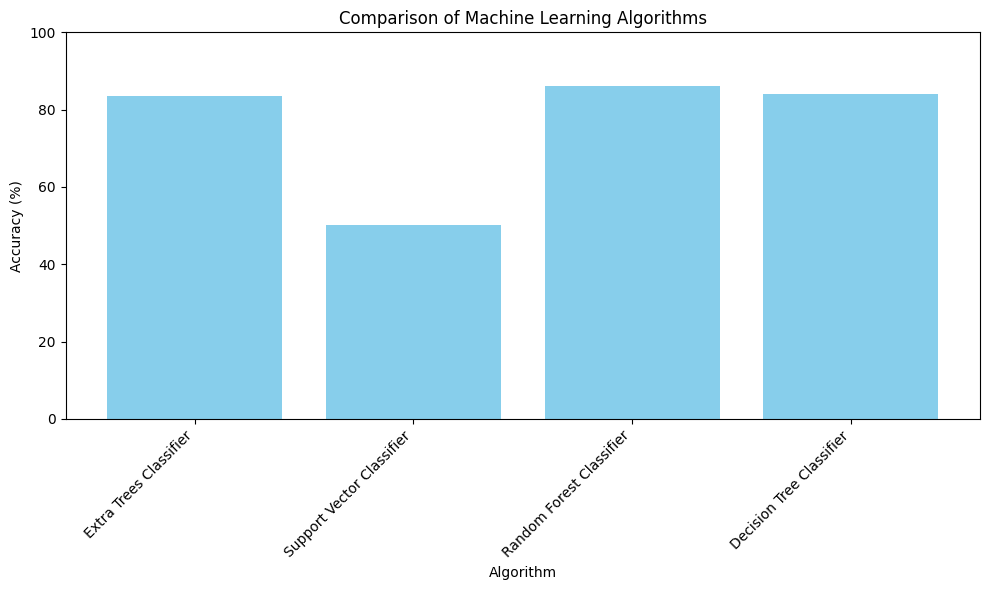

In [74]:
classifiers = {
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=100, max_depth=6, min_samples_split=2, min_weight_fraction_leaf=0.0, n_jobs=-1),
     'Support Vector Classifier': SVC(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100),
    'Decision Tree Classifier': DecisionTreeClassifier(),
   
}


results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred) * 100
    results[name] = accuracy
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Machine Learning Algorithms')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [78]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred) * 100
    precision, recall, fscore, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {fscore:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix)
    print()

Classifier: Extra Trees Classifier
Accuracy: 83.59%
Precision: 0.85
Recall: 0.85
F1-score: 0.84
Confusion Matrix:
[[52  8  0]
 [24 51  0]
 [ 0  0 60]]

Classifier: Support Vector Classifier
Accuracy: 50.26%
Precision: 0.53
Recall: 0.52
F1-score: 0.49
Confusion Matrix:
[[53  6  1]
 [47 18 10]
 [15 18 27]]

Classifier: Random Forest Classifier
Accuracy: 85.13%
Precision: 0.86
Recall: 0.86
F1-score: 0.86
Confusion Matrix:
[[48 12  0]
 [16 59  0]
 [ 0  1 59]]

Classifier: Decision Tree Classifier
Accuracy: 80.00%
Precision: 0.81
Recall: 0.81
F1-score: 0.81
Confusion Matrix:
[[42 18  0]
 [20 55  0]
 [ 0  1 59]]



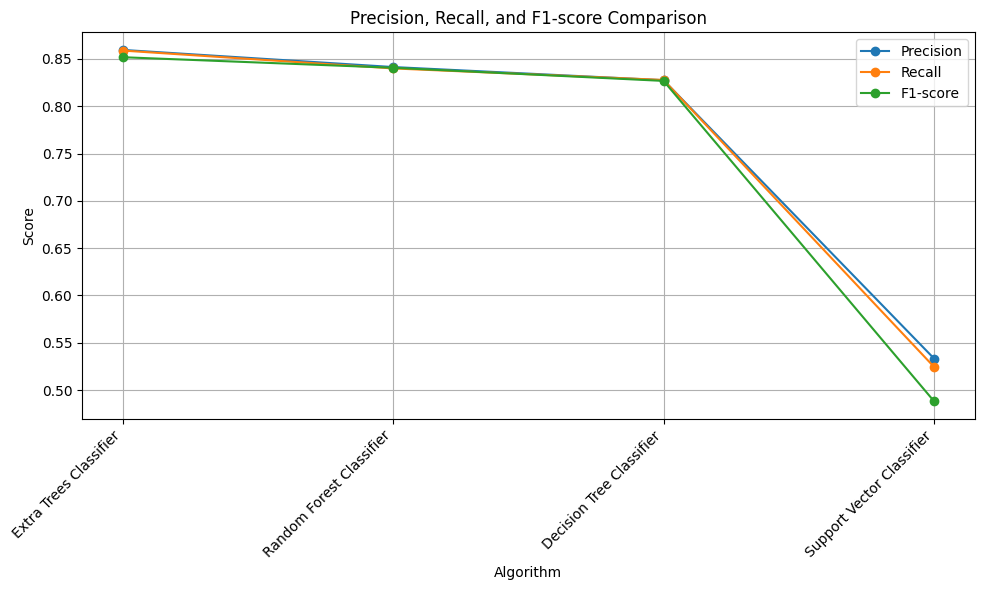

In [92]:
classifiers = {
    'Extra Trees Classifier': ExtraTreesClassifier(n_estimators=100, max_depth=6, min_samples_split=2, min_weight_fraction_leaf=0.0, n_jobs=-1),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Support Vector Classifier': SVC()
}

# Train and evaluate classifiers
results = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = metrics.accuracy_score(y_test, y_pred) * 100
    results[name] = accuracy
    
    precision, recall, f1, _ = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
    precision_scores[name] = precision
    recall_scores[name] = recall
    f1_scores[name] = f1

# Plot line graphs for precision, recall, and F1-score
plt.figure(figsize=(10, 6))

plt.plot(list(precision_scores.keys()), list(precision_scores.values()), marker='o', label='Precision')
plt.plot(list(recall_scores.keys()), list(recall_scores.values()), marker='o', label='Recall')
plt.plot(list(f1_scores.keys()), list(f1_scores.values()), marker='o', label='F1-score')

plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score Comparison')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()